# Assignment 7 - Artifical neural network (ANN)
The deadline for this assginment is 18.03 (Fri) 20:00

Being a subset of machine learning (ML) methods, **deep learning** follows the basic ML principle: find a hypothesis map out of a hypothesis space (represented by neural networks) that minimizes a chosen loss on datapoints. 

Neural networks are called networks because they are typically represened by composing together many different functions, and the computed values create a network-like structure. For example, we might have three functions $f^{(1)},f^{(2)}$and $f^{(3)}$ connected in a chain, to form $f(x)=f^{(3)}(f^{(2)}(f^{(1)}))$. In this case, $f{(1)}$is called the first layer of the network, $f^{(2)}$ is called the second layer, and so on. The overall length of the chain gives the depth of the network. Networks with multiple layers are called deep networks, hence the name deep learning.

Typically the final layer is called the **output layer**, and represents the label that we want to predict. The training datapoints "tell" what the output layer must do at each datapoint - it should produce a value that is close to the desired label. The behaviour of other layers however, is not directly specified by the training data. Instead the learning algorithm decides how to use these layers to find the best approximation of the ideal map by minimizing (locally) the loss on the training dataset. Thus, these layers are called **hidden layers**. 
<img src="neural_network.png" alt="neural network" style="width:600px;height:350px;">

In this assignment a fully connected multi-layer neural network, also called feed-forward neural network or **Multilayer Perceptron (MLP)**, is used to represent a hypothesis space that includes highly non-linear functions. MLP is the simplest type of a neural network, where each cell (neuron) is 'connected' to all the cells from the next layer, and only the next layer uses its value.

If you wish to gain understanding of how a neural network actually works and learns, [this video series](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) by 3blue1brown provides a briliant visual explanation.

## Learning goals
After successfully completing this assignment, you should be able to:
* understand the difference of hypothesis maps between MLP and linear models
* understand that activation functions are a key part of neural network design
* train MLPs to complete a regression task
* train MLPs to complete a classification task
* have some basic understanding of gradient based learning of ANN weights
* use grid-search for adjusting multiple MLP hyper-parameters such as number of layers and learning rate parameters

In [1]:
%config Completer.use_jedi = False  # enable code auto-completion
import numpy as np #import numpy to work with arrays
import pandas as pd #import pandas to manipulate the dataset
from matplotlib import pyplot as plt #import the module matplotlib.pyplot to do visulization
from sklearn.preprocessing import PolynomialFeatures    # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score    # function to calculate mean squared error 

# Basic neural network structure
Take a look at the image below, showing a very basic neural network, with one-element input layer `x` and output layer `y`, and a single hidden layer with 3 hidden units:

![A simple neural network schema](network-schema.png)



The process of calculating the output of the network is as follows. We have the network defined as above, and a bias vector `[bias1, bias2, bias3]` corresponding to the `hidden1, hidden2, hidden3` hidden units. Then:
1. We multiply x with the first layer's weights, and add a constant bias term. We have obtained initial values of the hidden 'neuron' activations. A single value is calculated as:
$$
hidden_i = x * weight_{1i} + bias_i
$$
1. Simply multiplying and adding to the initial value of x would not let us represent any complex non-linear functions, so we need to introduce a non-linearity to our network. It is done via activation functions in the hidden layer, and the most common one is the rectified linear unit (ReLU):
$$
ReLU(x) = max(x, 0)
$$
It could be thought of as a function replacing negative values with 0s. We apply it to our hidden layer activations:
$$
hidden_i = ReLU(hidden_i)
$$
1. Now that we have the activation values, we multiply them with the final weights and sum the result together to obtain the final output:
$$
y = hidden_1 * weight_{21} + hidden_2 * weight_{22} + hidden_3 * weight_{23}
$$

Note that there is no bias in the last step. We also do not use ReLU anymore, as it is a simple regression network. However, for classification, you would use a different activation function for your output to turn it into a probability distribution - see [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) (binary) or [softmax](https://en.wikipedia.org/wiki/Softmax_function) (multiclass)

<div class=" alert alert-warning">
    
# Student Task A7.1
    
Use your understanding of how a neural network works, to set the correct weights and biases for our toy neural network example from above, so that the resulting function `f(x) = y` is a non-linear function looking like this:
![Neural Network hypothesis plot](network-triangle.png)
    
Note that this would not be possible with linear models we studied previously, such as linear regression or SVMs.

The vertices of the triangle must be the points `(0, 0), (1, 1), (2, 0)`. Fill in the missing (`None`) values in the `weights_1`, `weights_2`, and `bias` vectors. There is no need to change the values that have already been set!
    
Hint:  Try it out as a math problem with pen and paper if you have trouble! Try to think what are the already given functions $hidden_1(x)$ and $hidden_3(x)$, what unknowns there are in $hidden_2$, and what is the result of adding them together to obtain $y = f(x) = hidden_1(x) + hidden_2(x) + hidden_3(X)$ - e.g. with the given values:
    
$
hidden_3(x) = 1 * x - 2 
$; for `x > 2`(i.e.`(1*x-2) > 0`)
    
$
hidden_3(x) = 0
$; otherwise
    
There are also visualizations of the intermediate plots below.
<div>

In [2]:
## In the following two lines of code, please fill in the None values in a way allowing you to obtain 
## the given hyphothesis shape.  No need to change the given values in weights_1, bias.

weights_1 = np.array([1., 2., 1.])     # a vector represents [w11, w12, w13]
bias = np.array([0., -2, -2.])         # a vector represents [bias1, bias2, bias3]
print(weights_1)
print(bias)
# YOUR CODE HERE
weights_2 = np.array([1, -1, 1])         # a vector represents [w21, w22, w23]



[1. 2. 1.]
[ 0. -2. -2.]


In [3]:
def hidden(x, weights_1, bias):
    """
    Inputs: x,feature,scalar
            weights_1, vector, [w11,w12,w13]
            bias, vector, [bias1,bias2,bias3]
    Output: activations, vector
    """
    hidden_x = x * weights_1 + bias 
    return np.maximum(hidden_x, 0) # Apply the ReLU activation

def network(x, weights_1, bias, weights_2):
    """
    Inputs: x, feature,scalar
            weights_1, vector, [w11,w12,w13]
            bias, vector, [bias1,bias2,bias3]
            weights_2, vector, [w21,w22,w23]
    Output: predicted label, scalar
    """
    hidden_x = hidden(x, weights_1, bias) # Calculate the hidden activations
    final_x = hidden_x * weights_2 # Multiply them with the final weights [w21, w22, w23]
    return sum(final_x) # Sum the result to obtain the final prediction

Let's check how the results look visually, starting with the hidden layer activations:

In [4]:
x_to_plot = np.linspace(-0.5, 2.5, 99) # X values to serve as inputs for our network for plotting

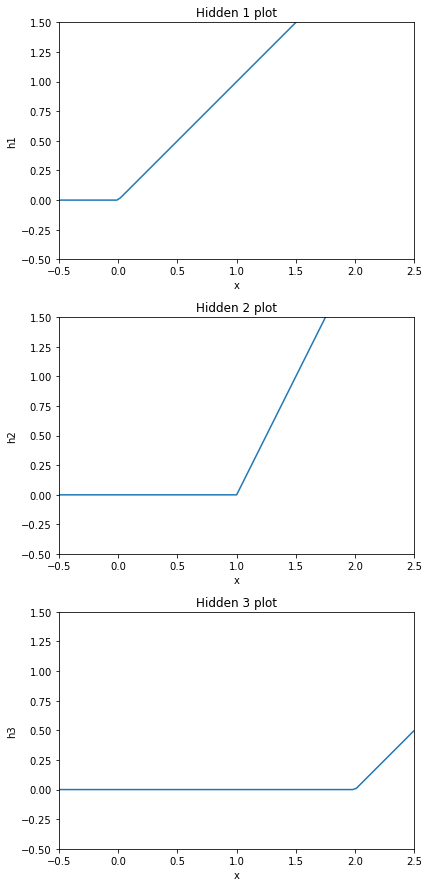

In [5]:
plt.figure(figsize=(10, 12))
for i in range(3):
    plt.tight_layout()
    plt.subplot(3, 1, i + 1)
    
    # Compute the hidden layer activations
    hidden_to_plot = [hidden(x, weights_1, bias)[i] for x in x_to_plot]
    
    # Make sure all plots use the same scale
    plt.xlim(-0.5, 2.5) 
    plt.ylim(-0.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Plot the hidden layer activations
    plt.title(f'Hidden {i + 1} plot')
    plt.xlabel('x')
    plt.ylabel(f'h{i + 1}')
    plt.plot(x_to_plot, hidden_to_plot)

Now let's add the hidden activations multiplied by `weights_2` together, and plot the final hyphothesis:

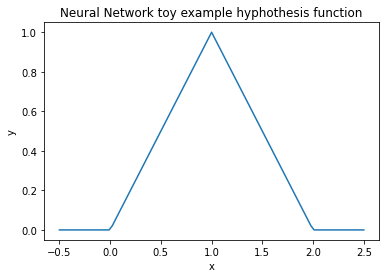

In [6]:
y_to_plot = [network(x, weights_1, bias, weights_2) for x in x_to_plot] # Use our network to obtain y values
plt.title('Neural Network toy example hyphothesis function')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_to_plot, y_to_plot)

In [7]:
# Sanity check the resulting values:
assert np.isclose(network(0, weights_1, bias, weights_2), 0.)
assert np.isclose(network(1, weights_1, bias, weights_2), 1.)
assert np.isclose(network(2, weights_1, bias, weights_2), 0.)
assert np.isclose(y_to_plot[0], 0.)
assert np.isclose(y_to_plot[-1], 0.)
assert np.isclose(y_to_plot[len(y_to_plot) // 2], 1.)

In [8]:
# This is a test cell for A7.1


## Dataset for this assignment
We are going to reuse the dataset we have been working with in the previous assignments, but this time we will formulate a different ML problem: predicting air temperature by using history records, in particular, the label is air temperature at 00:00 of a given day, the features are air temperatures of previous 5 days at the same time, 00:00.

In [9]:
# Read in the data stored in the file 'FMIData_Assignment7.csv' and clean the dataset
data = pd.read_csv('FMIData_Assignment7.csv')
# drop unrelevant columns
data.drop(columns=['Time zone','Precipitation amount (mm)','Snow depth (cm)',\
                 'Ground minimum temperature (degC)','Maximum temperature (degC)', 'Minimum temperature (degC)'],inplace=True)  
data.columns =['year','m','d','time','air temperature'] # rename columns 

# Select only weather recordings whose property 'time' is equal to `00:00`
data = data[data['time'] == '00:00']

# Shift the column 'air temperatrue' by different periods to obtain history records
data['pre_1'] = data['air temperature'].shift(1)
data['pre_2'] = data['air temperature'].shift(2)
data['pre_3'] = data['air temperature'].shift(3)
data['pre_4'] = data['air temperature'].shift(4)
data['pre_5'] = data['air temperature'].shift(5)

data = data.iloc[5:] # drop the first 5 rows which involves NAN
data.head()

,year,m,d,time,air temperature,pre_1,pre_2,pre_3,pre_4,pre_5
10,2020,1,6,00:00,1.5,-1.6,1.7,4.6,3.6,1.5
12,2020,1,7,00:00,4.5,1.5,-1.6,1.7,4.6,3.6
14,2020,1,8,00:00,5.3,4.5,1.5,-1.6,1.7,4.6
16,2020,1,9,00:00,2.1,5.3,4.5,1.5,-1.6,1.7
18,2020,1,10,00:00,-2.0,2.1,5.3,4.5,1.5,-1.6


<div class=" alert alert-warning">
    
# Student Task A7.2

In this problem formulation, a datapoint represents a day corresponding to a row in the dataframe. The column "air temperature" stores the labels and columns 'pre_1', 'pre_2', 'pre_3', 'pre_4', 'pre_5' are used as features.
    
Before training an MLP, let's firstly try out the old method we used before: PolynomialRegression. 
    
As usual, we create the feature matrix and label vector and then train several models with different polynomial degrees to see which one is ideal.

**Your task** is: create a feature matrix and a label vector
    
</div>

In [23]:
## Create feature matrix and label vector:
print(data.head())
X = data[["pre_1","pre_2","pre_3","pre_4","pre_5"]].values
y = data['air temperature'].values
#X = data.to_numpy()[:, 5: 10].astype(np.float)      # features are air temperatures of previous 5 days 
print(X)
#y = data.to_numpy()[:, 4].astype(np.float)        # label is air temperature of the present day
print(y)
# YOUR CODE HERE

print(X.shape)
print(y.shape)
#print(X[1][1] + y[1])
assert X.ndim == 2,  "Wrong dimension of X"  #sanity check the dimension of X
assert X.shape[1] == 5, "wrong shape of X"  #sanity check the shape of X
assert y.ndim == 1,  "Wrong dimension of y"  #sanity check the dimension of y
assert y.shape[0] == 708, "Wrong shape of y" #sanity check the shape of y

    year  m   d   time  air temperature  pre_1  pre_2  pre_3  pre_4  pre_5
10  2020  1   6  00:00              1.5   -1.6    1.7    4.6    3.6    1.5
12  2020  1   7  00:00              4.5    1.5   -1.6    1.7    4.6    3.6
14  2020  1   8  00:00              5.3    4.5    1.5   -1.6    1.7    4.6
16  2020  1   9  00:00              2.1    5.3    4.5    1.5   -1.6    1.7
18  2020  1  10  00:00             -2.0    2.1    5.3    4.5    1.5   -1.6
[[ -1.6   1.7   4.6   3.6   1.5]
 [  1.5  -1.6   1.7   4.6   3.6]
 [  4.5   1.5  -1.6   1.7   4.6]
 ...
 [ -2.2  -7.2 -15.4 -14.2 -13. ]
 [  0.1  -2.2  -7.2 -15.4 -14.2]
 [  1.2   0.1  -2.2  -7.2 -15.4]]
[  1.5   4.5   5.3   2.1  -2.    0.    5.2   1.6   3.3   5.8   5.    4.
   3.5   3.6   3.3   5.2   1.2   0.    1.7   0.3   2.9   0.6   3.    1.8
   1.7   1.9   2.5   3.8  -0.5  -4.6  -1.3  -3.3  -3.5   0.9   3.3   3.8
   3.1   2.6   1.8  -1.    1.9   3.7   5.1   5.1   3.8   1.2   3.    3.9
   3.4   1.6  -1.7  -1.2  -3.4  -3.8  -2.8   1.6   3.3 

In [ ]:
# this is the test cell for A7.2

In [ ]:
from sklearn.model_selection import train_test_split 
# Split the dataset into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
## define a list of values for the maximum polynomial degree 
degrees = [1,2,3,4]    

# we will use this variables to store the resulting training and validation errors for each polynomial degree
linear_tr_errors = []          
linear_val_errors = []
for degree in degrees:    # use for-loop to fit polynomial regression models with different degrees
    lin_regr = LinearRegression(fit_intercept=False) # NOTE: "fit_intercept=False" as we already have a constant iterm in the new feature X_poly
    poly = PolynomialFeatures(degree=degree)    # generate polynomial features
    X_train_poly = poly.fit_transform(X_train)    # fit the raw features
    lin_regr.fit(X_train_poly, y_train)    # apply linear regression to these new features and labels
  
    y_pred_train = lin_regr.predict(X_train_poly)    # predict using the linear model
    tr_error = mean_squared_error(y_train, y_pred_train)    # calculate the training error
    X_val_poly = poly.transform(X_val) # transform the raw features for the validation data 
    y_pred_val = lin_regr.predict(X_val_poly) # predict values for the validation data using the linear model 
    val_error = mean_squared_error(y_val, y_pred_val) # calculate the validation error
 
    linear_tr_errors.append(tr_error)
    linear_val_errors.append(val_error)

In [ ]:
# create a table to compare training and validation errors
errors = {"poly degree":degrees,
          "linear_train_errors":linear_tr_errors,
          "linear_val_errors":linear_val_errors,
         }
pd.DataFrame({ key:pd.Series(value) for key, value in errors.items()})

<div class=" alert alert-warning">

# Student Task A7.3

Answer the following quiz questions by setting the corresponding variable to the index of the answer that you consider correct. 
    
Question 1: Which of the models from A7.2 would you recommend based on the above table?
- Answer 1: Degree 1
- Answer 2: Degree 2
- Answer 3: Degree 3
- Answer 4: Degree 4
    

</div>

In [ ]:
## set Answer_Q1 to the index (starting from 1 !!!) of the correct answer (e.g., Answer_Q1=1 if you think Answer 1 is correct)
Answer_Q1 = 2  

# YOUR CODE HERE

print("my answer is: ", Answer_Q1)

In [ ]:
# sanity check datatype of Answer_Q1
assert Answer_Q1 in (1, 2, 3, 4), "Please answer with a number from 1 to 4"

In [ ]:
# this is the test cell for A7.3

<div class=" alert alert-warning">

# Student Task A7.4

Now, we know the performance of polynomial regression on this prediction task. It is time to try out MLP and see whether MLP can defeat polynomial regression or not.

We will still focus on Sklearn library and use Sklearn class [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) to implement our model, but for complicated modern deep learning tasks, Python provides other easy-to-use libraries for the design and training of ANN, such as [Keras](https://keras.io/).


**Hypothesis Space used in this task - MLP Structure:**
- one input layer consists of the individual features (5 features) and is the entry point to the MLP.
- several hidden layers with 15 neuron units in each layer and [ReLU activation function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), we will explore the number of hidden layers in this task, find out the ideal number of hidden layers for this given ML problem.

- one final output layer with 1 neuron unit.

For regularization strength and learning rate, default values are used.

**Loss used in this task**: MSE

In the following solution cell, you will:
- Initialise an MLPRegressor, please use the `hidden_layer_sizes` defined for you and set `max_iter` to 1000, `random_state` to 42.
- Train the regressor on the training set.
- Evaluate the regressor on the training set and validation set.
</div>

In [ ]:
from sklearn.neural_network import MLPRegressor

## define a list of values for the number of hidden layers
num_layers = [1,2,4,6,8,10]    # number of hidden layers
num_neurons = 15  # number of neurons in each layer


# we will use this variable to store the resulting training errors corresponding to different hidden-layer numbers
mlp_tr_errors = []          
mlp_val_errors = []

for i, num in enumerate(num_layers):
    hidden_layer_sizes = tuple([num_neurons]*num) # size (num of neurons) of each layer stacked in a tuple
    
    mlp_regr = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes, max_iter = 1000, random_state = 42) # Initialise an MLPRegressor
 
    mlp_regr.fit(X_train, y_train)    # Train MLP on the training set
    
    '''
>>> X_train, X_test, y_train, y_test = train_test_split(X, y,
...                                                     random_state=1)
>>> regr = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes, max_iter = 1000, random_state=42).fit(X_train, y_train)
>>> regr.predict(X_test[:2])
array([-0.9..., -7.1...])
>>> regr.score(X_test, y_test)
    '''
    # YOUR CODE HERE
    
    ## evaluate the trained MLP on both training set and validation set
    y_pred_train = mlp_regr.predict(X_train)    # predict on the training set
    tr_error = mean_squared_error(y_train, y_pred_train)    # calculate the training error
    y_pred_val = mlp_regr.predict(X_val) # predict values for the validation data 
    val_error = mean_squared_error(y_val, y_pred_val) # calculate the validation error
    
    # sanity check num of layers
    assert mlp_regr.n_layers_ == num_layers[i]+2 # total layers = num of hidden layers + input layer + output layer
    # sanity check the error values
    assert 3 < tr_error < 4 and 5 < val_error < 6
    
    mlp_tr_errors.append(tr_error)
    mlp_val_errors.append(val_error)

# sanity check the length of array mlp_tr_errors
assert len(mlp_tr_errors) == len(mlp_val_errors) == len(num_layers)

In [ ]:
# this cell is for tests for A7.4


In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(num_layers, mlp_tr_errors, label = 'Train')
plt.plot(num_layers, mlp_val_errors,label = 'Valid')
plt.xticks(num_layers)
plt.legend(loc = 'upper left')

plt.xlabel('Layers')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()

In [ ]:
# create a table to compare the training and validation errors for MLPs with different number of hidden layers
errors = {"num_hidden_layers":num_layers,
          "mlp_train_errors":mlp_tr_errors,
          "mlp_val_errors":mlp_val_errors,
         }
pd.DataFrame(errors)

<div class=" alert alert-warning">

# Student Task A7.5

Answer the following quiz questions by setting the corresponding variable to the index of the answer that you consider correct. 
    
Question 1: Which of the models from A7.4 would you recommend based on the table above?
- Answer 1: 1 hidden layer MLP
- Answer 2: 2 hidden layers MLP
- Answer 3: 4 hidden layers MLP
- Answer 4: 6 hidden layers MLP
- Answer 5: 8 hidden layers MLP
- Answer 6: 10 hidden layers MLP 
    

</div>

In [ ]:
## set Answer_Q1 to the index (starting from 1 !!!) of the correct answer (e.g., Answer_Q1=1 if you think Answer 1 is correct)
Answer_Q1  = 2

# YOUR CODE HERE

print(f"my answer is: Answer {Answer_Q1}")

In [ ]:
# sanity check datatype of Answer_Q1
assert Answer_Q1 in (1, 2, 3, 4, 5, 6), "Please answer with a number 1-6"

In [ ]:
# this cell is for tests for A7.5

In [ ]:
l_errors = {"poly degree":degrees,"linear_train_errors":linear_tr_errors, "linear_val_errors":linear_val_errors,}
print("training errors and validation errors of PolynomialRegression")
pd.DataFrame(l_errors).style.applymap(lambda x: "background-color: yellow" if x==np.max(linear_val_errors) else "background-color: white")

In [ ]:
m_errors = {"mlp_train_errors":mlp_tr_errors, "mlp_val_errors":mlp_val_errors}
print("training errors and validation errors of MLP")
pd.DataFrame(errors).style.applymap(lambda x: "background-color: yellow" if x==np.max(mlp_val_errors) else "background-color: white")

**PolynomialRegression vs MLP**

The tables above compare the performance of PolynomialRegression and MLP on this specific ML problem. We can see that their performances are similar, but MLP is a bit better than PolynomialRegression. Considering sampling randomness, this suggests that deep learning methods are not always undisputed winners, particularly for simpler tasks where a simple model would train faster, predict quicker, and achieve comparable results.

However, one significant advantage of MLP, even for simple problems, is that it is much less sensitive to model complexity than regression, so even without careful hyperparameter tuning the network always somehow 'does the job for us' with decent validation errors ~5, while regression explodes with an error of 18+ when we use a too complex model (max poly degree=4).

<div class=" alert alert-warning">

# Student Task A7.6
    
    
**Train MLP classifiers and evaluate them on both training set and validation set.**
    
**Problem Formulation**: just like in Assingment3, we first categorize air temperature into 4 categories, for each datapoint (a day), the label is categorized air temperature of a given day at 00:00 and the features are air temperatures of previous 5 days at 00:00. 
   



**Hypothesis Space - MLP Structure:**


- one input layer consists of the individual features (5 features) and is the entry point to the MLP
- several hidden layers with 10 neuron units and [ReLU activation function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), we will explore the number of hidden layers in this task, find out the ideal number of hidden layers for this given ML problem.

- one final output layer with 4 neuron units and [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function)

For regularization strength and learning rate, default values are used.

**Loss**: log-loss

</div>

In [ ]:
## dataset preparing
minvalue = y.min() # minimum of the column 'air temperature'
maxvalue = y.max() # maximum of the column 'air temperature'
    
labels = [0,1,2,3] # new labels to be assigned
cut_bins = [minvalue,0,5,10,maxvalue] #cutting intervals/criteria

# encode air temperatures (label) to categorical labels
y_clf = pd.cut(y, bins=cut_bins,labels=labels,include_lowest=True).to_numpy()

# features remain same, but assign different variable name to make the names more consistent
X_clf = np.copy(X)

# split data into training set and validation set
X_clf_train, X_clf_val, y_clf_train, y_clf_val = train_test_split(X_clf, y_clf, test_size=0.33, random_state=0)

<div class=" alert alert-warning">    

In the following solution cell, you will:
- Initialise an MLPClassifier, please use the `hidden_layer_sizes` defined for you and set `max_iter` to 5000, `learning_rate_init` to 0.0001 and `random_state` to 0.
- Train the classifier on the training set.
- Evaluate the classifier on the training set and validation set.

    
**Sklearn class**: [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)  provides the methods you need to complete model training.

**Model performance evaluation**: calculate the train and validation accuracy (average **0/1 loss**). The function [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) has been imported for you in the beginning of this notebook.
</div>

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
## Note: the execution time of this cell might be > 2 mins
## define a list of values for the number of hidden layers
num_layers_clf = [1,2,4,6,8,10]    # number of hidden layers,
num_neurons = 10       # number of neurons of each layer, we fix this to 10 in this task


# we will use this variables to store the resulting training accs for each number of hidden layers
mlp_tr_accs = []          
mlp_val_accs = []

for i,num in enumerate(num_layers_clf):  
    hidden_layer_sizes = tuple([num_neurons]*num) 
    
    mlp_clf = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, max_iter = 5000, learning_rate_init = 0.0001, random_state = 0)           # initialise a MLPClassifier
    mlp_clf.fit(X_clf_train, y_clf_train)    # train the calssifier
   
    # YOUR CODE HERE
    
    y_pred_train = mlp_clf.predict(X_clf_train)    # predict using the trained model
    tr_acc = accuracy_score(y_clf_train, y_pred_train)    # calculate the training acc
    
    y_pred_val = mlp_clf.predict(X_clf_val) # predict for the validation data 
    val_acc =  accuracy_score(y_clf_val, y_pred_val) # calculate the validation acc
    
    # sanity check num of layers
    assert mlp_clf.n_layers_ == num_layers_clf[i]+2 # num of total layers 
    # sanity check the acc values
    assert 0.8 < tr_acc < 0.9 and 0.7 < val_acc < 0.85
    
    mlp_tr_accs.append(tr_acc)
    mlp_val_accs.append(val_acc)

# sanity check the length of array tr_accs
assert len(mlp_tr_accs) == len(mlp_val_accs) == len(num_layers_clf)

In [ ]:
plt.plot(num_layers_clf, mlp_tr_accs, label = 'Train')
plt.plot(num_layers_clf, mlp_val_accs,label = 'Valid')
plt.xticks(num_layers_clf)
plt.legend(loc = 'upper left')

plt.xlabel('Layers')
plt.ylabel('Accuracy')
plt.title('Train vs validation accuracy')
plt.show()

In [ ]:
accus = {"num_hidden_layers":num_layers_clf,
          "MLP_train_accs":mlp_tr_accs,
          "MLP_val_accs":mlp_val_accs,
         }
pd.DataFrame(accus)

<div class=" alert alert-warning">

# Student Task A7.7

Answer the following quiz questions by setting the corresponding variable to the index of the answer that you consider correct. 
    
Question 1: Which of the models from A7.6 would you recommend based on the table above?
- Answer 1: 1 hidden layer MLP
- Answer 2: 2 hidden layers MLP
- Answer 3: 4 hidden layers MLP
- Answer 4: 6 hidden layers MLP
- Answer 5: 8 hidden layers MLP
- Answer 6: 10 hidden layers MLP 
- Answer 7: 12 hidden layers MLP
    

</div>

In [ ]:
## set Answer_Q1 to the index (starting from 1 !!!) of the correct answer (e.g., Answer_Q1=1 if you think Answer 1 is correct)
Answer_Q1  = 5  

# YOUR CODE HERE

print(f"my answer is: Answer {Answer_Q1}")
assert Answer_Q1 in range(1,8), "Please use an int in the range [1,7] for your answer"

In [ ]:
# this cell is for tests for A7.7

<div class=" alert alert-info">

# Demo: Learning rate
The main learning algorithm for deep learning is gradient descent. From calculus courses, you should be familiar with what a gradient (or a derivative for a single variable function) represents. By using it, we can learn how our function is behaving in a given datapoint (is it rising or falling?), and based on that, we know 'which direction to go' in order to minimize it. Neural networks learn by computing the gradient of the loss function, which gives them the information on how to change their weights to move towards the local minimum.

Typically we would take an average direction based on a batch of datapoints, usually 16/32/64 of them at a time. However, the gradient just gives us the direction, we do not know how far in that direction we should go. We control that using a number called the **learning rate**, which lets us scale the steps we take. 
```
weight_update = update_from_the_gradient * learning_rate
```

If we are too careful and set a very small learning rate, taking baby steps towards the minimum, our training would take too long. On the other hand, if the learning rate is too big, we might 'overshoot', and keep missing the optimal point. This means that learning rate is usually the most important training parameter and should be chosen carefully, and even adjusted during the training - luckily most libraries provide us with good default values and training algorithms.

Gradient descent is a complex topic, and the above explanation is very simplified. We highly recommend [this video](https://www.youtube.com/watch?v=IHZwWFHWa-w) by 3blue1brown, showing the process in greater detail, with easy to understand animations. 
    
Take a look at the code below, showing what happens to the training process when we change the learning rate:
</div>

In [ ]:
lrs = [1e-07,0.0001,0.002]  # 3 different learning rate
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,4))
for i, lr in enumerate(lrs):
    mlp_regr = MLPRegressor((10,15,15,10),max_iter=3000,batch_size=64,\
                            solver='sgd',learning_rate_init=lr,random_state=42) 
    mlp_regr.fit(X_train, y_train)    # Train MLP on the training set
    axes[i].plot(mlp_regr.loss_curve_[:1000]) 
    axes[i].set_title(f'lr={lr}\n minimum loss={mlp_regr.loss_}')
    axes[i].set_ylabel('Loss')
    axes[i].set_yticks(np.arange(0,80,5))
    axes[i].set_xlabel('optimization iterations')
plt.show()

#NOTE: The warning you see is for the first learning rate 1e-07

<div class=" alert alert-warning">

# Student task A7.8
Answer the following quiz questions by setting the corresponding variable to the index of the answer that you consider correct:
    
Question1: 'Larger learning rate is always better, since it lets our model converge faster, reducing the length of the trainig.' - is this sentence true or false?
- Answer 1: True
- Answer 2: False
</div>



In [ ]:
## set Answer_Q1 to the index (starting from 1 !!!) of the correct answer (e.g., Answer_Q1=1 if you think Answer 1 is correct)
Answer_Q1 = 2   

# YOUR CODE HERE

print(f"my answer is: Answer {Answer_Q1}")
assert Answer_Q1 in (1,2), "Please use 1 or 2 for your answer"

In [ ]:
# this cell is for tests for A7.8

<div class=" alert alert-info">

# Demo: Grid search
By now, you have experienced model selections based on different parameters, such as max poly degree for Polynomial Regression, alpha for Ridge Regression, number of hidden layers for MLP, etc.
These parameters are called hyperparameters, because they are not directly learnt within regressors/classifiers, but rather a property of the training process selected by humans. In sklearn they are passed as arguments to the constructor of the regressor/classifier instances or feature transforming classes. 

In previous assignments and tasks, We used for loops to iterate a list of candidate hyperparameters to train corresponding models and compare the train/validation errors to do final model selection/adjusting. But most models, especially complicated models such as ANNs, have multiple hyper-parameters. Using (deeply) nested for-loops to search for a best combination from a large hyper-parameter space will make the code quite tedious, so sklearn provides a grid search method [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)
to exhaustively search candidates from a grid of parameter values specified with the `param_grid` parameter. For instance, the following param_grid will be used in this demo of hyperparameters for tuning/adjusting the MLPClassifier:
    
<code> param_grid = {
    'hidden_layer_sizes': [(15,15),(10)],
    'learning_rate_init':[0.001,0.01]
}
</code>

We first define the model (mlp_grids). GridSearchCV method is used to `fit()` the model for different combinations of the hyper-parameters specified in `param_grid` and give the best combination based on the validation accuracies. `cv` is the parameter to specify how many folds will be used for cross validation. For more details, please read the documentation.   

Note: Do not worry about ConvergenceWarnings - since we try various hyperparameters, it is normal that not all of the models converge properly.
</div>

In [ ]:
## Note: the execution time of this cell might be > 2 mins
from sklearn.model_selection import GridSearchCV

mlp_grids = MLPClassifier(max_iter=3000,random_state=1)

## to limit the executive time, a small hyper-parameter space is used, you can feel free to expand the space,
## such as adding more candidate network sizes, learning rates or the other hyper-parameters.
param_grid = {
    'hidden_layer_sizes': [(15,15),(10)],     # different depth and width of the network
    'learning_rate_init':[0.001,0.01]          # different learning rate
}

classifier = GridSearchCV(estimator=mlp_grids,param_grid=param_grid,cv=5,return_train_score=True)
classifier = classifier.fit(X_clf,y_clf)

In [ ]:
# to see the best hyperparameter combination
print('Best hyper-parameters found:\n\n', classifier.best_params_) 

<div class=" alert alert-warning">

# Student Task A7.9
Please carefully read the documentation of [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), figure out how to obtain the attribute: best score (it is the best validation accuracy) for the classifiers trained in the demo and assign it to the variable `best_accuracy`.

</div>

In [ ]:
best_accuracy = classifier.best_score_

# YOUR CODE HERE

print('Best validation accuracy:\n\n', best_accuracy) 

In [ ]:
# this is the test cell for A7.9
### BEGIN HIDDEN TESTs
assert np.isclose(best_accuracy,classifier.best_score_)
### END HIDDEN TESTs

<div class=" alert alert-warning">

# Student Task A7.10
Answer the following quiz questions by setting the corresponding variable to the index of the answer that you consider correct. 

Question 1: "If the activation functions are all linear functions, Neural Network only acts as a linear hypothesis mapper." Is this statement correct?
- Answer 1: Yes, it is correct.
- Answer 2: No, it is not correct.
    
Question 2: "Neural Networks can approximate any continuous function." Is this statement correct?
- Answer 1: Yes, it is correct.
- Answer 2: No, it is not correct.
    
</div>

In [ ]:
## set Answer_Q1 and Answer_Q2 to the index (starting from 1 !!!) of the correct answer (e.g., Answer_Q2=1 if you think Answer 1 is correct)
Answer_Q1 = 1
Answer_Q2 = 1  

# YOUR CODE HERE

print("My answer for Question1 is:", Answer_Q1)
print("My answer for Question2 is:", Answer_Q2)

assert Answer_Q1 in [1,2] 
assert Answer_Q2 in [1,2] 

In [ ]:
# this cell is for tests for A7.10

In [ ]:
# this cell is for tests for A7.10